# Data Pre-processing I

## Import Packages and Raw Data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

### Expression Data

In [12]:
df_raw_exp = pd.read_csv("expression.csv", sep=";")
df_raw_exp.tail(1)

,TIMESTAMP,LANDMARK,ACCURACY,USERS_ID,ID_KATEGORI,ID_MATERI,ID_LABELS
76186,2022-06-14 09:48:01,"[{""_x"":306.8856245367432,""_y"":322.865998956562...",0.77283,21,1,15,4


There are 7 columns and 76186 rows in expression data. The Landmark column shows the 68 landmark points obtained from the face and ID_LABEL shows the expression category of the detected face.

### Page Log Data

In [13]:
df_raw_log = pd.read_csv("page-log.csv", sep=";")

There are 4 columns and 19552 rows in expression data. The Title column shows the title of the page opened by the user.

### Data Users

In [14]:
df_raw_us = pd.read_csv("users.csv", sep=";")

There are 15 columns and 124 rows, which show that there are 124 user accounts created on e-learning.

## Cleaning Data

Remove all data that will not be used for the next step (EDA and Modeling)

### Keep the Useful Columns

In [15]:
# Drop data on expressions whose accuracy value is <0.5 because data with low accuracy may be of poor quality
df_raw_exp = df_raw_exp[~(df_raw_exp['ACCURACY'] < 0.5)]

# Keep the timestamp, landmark, accuracy, users_id, and id_labels columns in the expression data
df_raw_exp = df_raw_exp[['TIMESTAMP', 'LANDMARK', 'USERS_ID', 'ID_LABELS']]

# Keep the timestamp, id_user, dan title columns in the page log data 
df_raw_log = df_raw_log[['TIMESTAMP', 'ID_USER', 'TITLE']]

# Keep the id dan username columns on the users data
df_raw_us = df_raw_us[['id', 'username']]

### Cleaning Page Log

In [16]:
df_raw_log['TITLE'] = df_raw_log['TITLE'].apply(lambda x: x.split(' · ')[0])
df_raw_log = df_raw_log.rename(columns={'TITLE':'PAGE'})
df_raw_log.head(2)

,TIMESTAMP,ID_USER,PAGE
0,2022-01-16 19:49:02,0,Home
1,2022-01-17 08:40:56,0,Home


### Drop Non-Student Data

In [17]:
# In users data, users with ID numbers 1-5 are users who are non-student, so they will be dropped
df_us = df_raw_us[~df_raw_us['id'].isin([1,2,3,4,5])]

In [18]:
# Similar to data users, users with IDs 1-5 will also be deleted from expression data and page log data
df_exp = df_raw_exp[~df_raw_exp['USERS_ID'].isin([0,1,2,3,4,5])]
df_exp.tail(2)

,TIMESTAMP,LANDMARK,USERS_ID,ID_LABELS
76185,2022-06-14 09:47:21,"[{""_x"":264.55411643880905,""_y"":341.22101124801...",21,4
76186,2022-06-14 09:48:01,"[{""_x"":306.8856245367432,""_y"":322.865998956562...",21,4


In [19]:
df_log = df_raw_log[~df_raw_log['ID_USER'].isin([0,1,2,3,4,5])]
df_log.tail(2)

,TIMESTAMP,ID_USER,PAGE
19533,2022-06-14 10:05:46,27,Learning Journey
19534,2022-06-14 10:05:54,27,Background Color - Latihan


## Check Missing Value & Duplicated Data 

### Missing Value

In [20]:
print('Missing Value Data Ekspresi')
print(df_exp.isna().sum(), '\n')
print('Missing Value Data Page Log')
print(df_log.isna().sum(), '\n')
print('Missing Value Data Users')
print(df_us.isna().sum())

Missing Value Data Ekspresi
TIMESTAMP    0
LANDMARK     0
USERS_ID     0
ID_LABELS    0
dtype: int64 

Missing Value Data Page Log
TIMESTAMP    0
ID_USER      0
PAGE         0
dtype: int64 

Missing Value Data Users
id          0
username    0
dtype: int64


Tidak ditemukan missing value pada data

In [21]:
print('Duplicated Data Ekspresi')
print(df_exp.duplicated().sum(), '\n')
print('Duplicated Data Page Log')
print(df_log.duplicated().sum(), '\n')
print('Duplicated Data Users')
print(df_us.duplicated().sum())

Duplicated Data Ekspresi
0 

Duplicated Data Page Log
0 

Duplicated Data Users
0


Tidak ditemukan duplikasi pada data

## Export Hasil Data Pre-processing I

In [72]:
df_exp = df_exp.reset_index(drop=True)
df_log = df_log.reset_index(drop=True)
df_us = df_us.reset_index(drop=True)

df_exp.to_csv('data_ekspresi.csv', index=False)
df_log.to_csv('data_page-log.csv', index=False)
df_us.to_csv('data_users.csv', index=False)

In [73]:
excel_exp = pd.read_csv('data_ekspresi.csv')
excel_exp.to_excel('excel_ekspresi.xlsx', index=False)

excel_log = pd.read_csv('data_page-log.csv')
excel_log.to_excel('excel_log.xlsx', index=False)

# Data Pre-processing II

## Separates Each Point on the Facial Landmark into 136 Columns

In [75]:
# Dataframe baru yang hanya berisi facial landmark
df_exp_landmark = df_exp[['LANDMARK']]

# Melakukan split dan membuang simbol-simbol serta karakter x dan y
for i in range(len(df_exp_landmark)):
    val = df_exp_landmark['LANDMARK'][i]
    temp = re.split(',', val)
    newlist = []
    for t in temp:
        t = t.replace('"', '')
        t = t.replace('[', '')
        t = t.replace(']', '')
        t = t.replace('{', '')
        t = t.replace('}', '')
        t = t.replace('}', '')
        t = t.replace('_x', '')
        t = t.replace('_y', '')
        t = t.replace(':', '')
        newlist.append(float(t))
    df_exp_landmark.at[i, 'LANDMARK'] = newlist

df_exp_landmark.head(3)

,LANDMARK
0,"[229.45241855236614, 356.09379288991516, 233.0..."
1,"[225.06507920776744, 349.91096878614627, 228.7..."
2,"[219.0011823290799, 349.4148616542516, 221.871..."


In [ ]:
# Put each point into a column

df_136 = df_exp_landmark.copy()

for i in range(136):
    point_list = [(df_136.at[j, 'LANDMARK'])[i] for j in range(len(df_136))]
    if ((i+1)%4 == 1): # x dan ganjil
        if (i+1) == 1: # karena 1/2 = 0.5
            column_name = 'x1'
        else:
            column_name = 'x' + str(int(((i+1)+1)/2))
    elif ((i+1)%4 == 2): # y dan ganjil
        column_name = 'y' + str(int((i+1)/2))
    elif ((i+1)%4 == 3): # x dan genap
        column_name = 'x' + str(int(((i+1)+1)/2))
    else: # y dan genap
        column_name = 'y' + str(int((i+1)/2))
    df_136[column_name] = point_list

In [68]:
df_136.head(3)

,LANDMARK,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,"[229.45241855236614, 356.09379288991516, 233.0...",229.452419,356.093793,233.072700,382.697789,239.577937,407.017036,246.066169,427.816592,255.373993,...,348.417727,465.386092,366.827051,461.560911,348.968219,466.223047,339.417008,467.230212,330.010349,467.113588
1,"[225.06507920776744, 349.91096878614627, 228.7...",225.065079,349.910969,228.761761,376.257360,235.295003,400.591286,241.620106,421.084769,250.987503,...,338.818514,460.336191,357.617564,456.651875,339.420836,460.104327,330.129006,461.192693,321.091426,461.167499
2,"[219.0011823290799, 349.4148616542516, 221.871...",219.001182,349.414862,221.871282,376.396733,228.013650,401.421438,233.964209,422.325008,243.005732,...,338.292473,465.359005,357.093169,461.770299,338.348126,466.616636,328.437615,467.624896,318.788377,467.534455


In [69]:
# Drop landmark column and add the id_labels column
df_136.drop('LANDMARK', inplace=True, axis=1)
df_136['ID_LABELS'] = df_exp['ID_LABELS']
df_136.head(3)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y64,x65,y65,x66,y66,x67,y67,x68,y68,ID_LABELS
0,229.452419,356.093793,233.072700,382.697789,239.577937,407.017036,246.066169,427.816592,255.373993,449.753891,...,465.386092,366.827051,461.560911,348.968219,466.223047,339.417008,467.230212,330.010349,467.113588,1
1,225.065079,349.910969,228.761761,376.257360,235.295003,400.591286,241.620106,421.084769,250.987503,443.689225,...,460.336191,357.617564,456.651875,339.420836,460.104327,330.129006,461.192693,321.091426,461.167499,7
2,219.001182,349.414862,221.871282,376.396733,228.013650,401.421438,233.964209,422.325008,243.005732,445.034585,...,465.359005,357.093169,461.770299,338.348126,466.616636,328.437615,467.624896,318.788377,467.534455,7


In [71]:
# Export 136 Data
# df_136.to_csv('data_136.csv', index=False)

## Create Facial Features Vector for Each Data

In [72]:
df_vector = df_136.copy()

In [73]:
# Function for calculate the distance between 2 points

def distance(p1, p2, index):
    x1 = df_vector.loc[index]['x'+str(p1)]
    y1 = df_vector.loc[index]['y'+str(p1)]
    
    x2 = df_vector.loc[index]['x'+str(p2)]
    y2 = df_vector.loc[index]['y'+str(p2)]
    
    dis = math.sqrt( ((x2-x1)**2) + ((y2-y1)**2) )
    return dis

In [74]:
# Function for normalize distance

def landmark(fixed, norm, points, index):    
    norm_distance = distance(fixed, norm, index)
    
    value = 0
    for i in points:
        dis = distance(fixed, i, index) / norm_distance
        value += dis
    
    return value

In [75]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

In [76]:
# Calculate

for i in range(len(df_vector)):
    list1.append(landmark(40, 22, [19, 20, 21, 22], i)) # for eyebrow left
    list2.append(landmark(43, 23, [26, 25, 24, 23], i)) # for eyebrow right
    list3.append(landmark(34, 52, [49, 50, 51], i)) # for lip left
    list4.append(landmark(34, 52, [55, 54, 53], i)) # for lip right
    list5.append(distance(49, 55, i)) # for width of lip
    list6.append(distance(52, 58, i)) # for height of lip

df_vector['e_left'] = list1
df_vector['e_right'] = list2
df_vector['l_left'] = list3
df_vector['l_right'] = list4
df_vector['m_width'] = list5
df_vector['m_height'] = list6

In [77]:
df_vector.head(3)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y67,x68,y68,ID_LABELS,e_left,e_right,l_left,l_right,m_width,m_height
0,229.452419,356.093793,233.072700,382.697789,239.577937,407.017036,246.066169,427.816592,255.373993,449.753891,...,467.230212,330.010349,467.113588,1,5.961667,6.060967,4.620668,4.551334,62.828336,18.717913
1,225.065079,349.910969,228.761761,376.257360,235.295003,400.591286,241.620106,421.084769,250.987503,443.689225,...,461.192693,321.091426,461.167499,7,5.994667,6.139699,4.420076,4.399097,61.370429,17.109366
2,219.001182,349.414862,221.871282,376.396733,228.013650,401.421438,233.964209,422.325008,243.005732,445.034585,...,467.624896,318.788377,467.534455,7,6.053836,6.276237,4.649788,4.486371,63.623881,19.205545


In [78]:
# Re-index each element of feature vector

df_vector = df_vector.copy()
df_vector = df_vector.reindex(columns = [col for col in df_vector.columns if col != 'ID_LABELS'] + ['ID_LABELS'])
df_vector.head(3)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y67,x68,y68,e_left,e_right,l_left,l_right,m_width,m_height,ID_LABELS
0,229.452419,356.093793,233.072700,382.697789,239.577937,407.017036,246.066169,427.816592,255.373993,449.753891,...,467.230212,330.010349,467.113588,5.961667,6.060967,4.620668,4.551334,62.828336,18.717913,1
1,225.065079,349.910969,228.761761,376.257360,235.295003,400.591286,241.620106,421.084769,250.987503,443.689225,...,461.192693,321.091426,461.167499,5.994667,6.139699,4.420076,4.399097,61.370429,17.109366,7
2,219.001182,349.414862,221.871282,376.396733,228.013650,401.421438,233.964209,422.325008,243.005732,445.034585,...,467.624896,318.788377,467.534455,6.053836,6.276237,4.649788,4.486371,63.623881,19.205545,7


In [79]:
# Export to csv
# df_vector.to_csv('data_vector.csv', index=False)

# Data Pre-processing III

## Aggregate Expression and Page Log

### Konversi timestamp pada ekspresi dan page log ke nilai epoch (integer)

In [77]:
# Function to convert the timestamp
def to_epoch(ts):
    dt = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return int(dt.timestamp())

def from_epoch(s):
    return datetime.fromtimestamp(s)

In [78]:
# Rename and re-index columns in expression data
data_exp = pd.read_csv('data_ekspresi.csv')
ts_exp = data_exp.pop('TIMESTAMP')
id_exp = data_exp.pop('USERS_ID')
data_exp = data_exp[['ID_LABELS']]
data_exp.insert(0, 'TIMESTAMP_EXP', ts_exp)
data_exp.insert(1, 'ID_USER_EXP', id_exp)

data_log = pd.read_csv('data_page-log.csv')

In [79]:
data_exp.head(3)

,TIMESTAMP_EXP,ID_USER_EXP,ID_LABELS
0,2022-04-21 13:21:14,9,1
1,2022-04-21 13:21:17,9,7
2,2022-04-21 13:21:28,9,7


In [80]:
data_log.head(3)

,TIMESTAMP,ID_USER,PAGE
0,2022-01-17 09:01:57,11,Home
1,2022-01-17 09:02:00,11,Learning Journey
2,2022-01-17 09:02:03,11,Images - Materi


In [84]:
# data_exp.head(5).to_excel('5before_epoch_exp.xlsx')

In [81]:
# Convert timestamp to epoch
data_exp['TIMESTAMP_EXP'] = data_exp['TIMESTAMP_EXP'].transform(lambda x: to_epoch(x))

# Convert timestamp to epoch
data_log['TIMESTAMP'] = data_log['TIMESTAMP'].transform(lambda x: to_epoch(x))

In [94]:
data_exp.head(3)

,TIMESTAMP_EXP,ID_USER_EXP,ID_LABELS
0,1650514874,9,1
1,1650514877,9,7
2,1650514888,9,7


In [96]:
# data_exp.head(5).to_excel('5after_epoch_exp.xlsx')

In [82]:
data_log.head(3)

,TIMESTAMP,ID_USER,PAGE
0,1642377717,11,Home
1,1642377720,11,Learning Journey
2,1642377723,11,Images - Materi


### Aggregate by Expression

Menggabungkan data page log ke data ekspresi berdasarkan selisih timestamp paling dekat dengan timestamp pada data ekspresi

In [83]:
df_exp_exp = data_exp.copy()
df_log_exp = data_log.copy()

In [84]:
list_user = df_log_exp['ID_USER'].unique().tolist()
print(list_user)

# Menghapus id user pada data exp yang tidak ada di data page log
df_exp_exp = df_exp_exp[df_exp_exp['ID_USER_EXP'].isin(list_user)]
df_exp_exp['ID_USER_EXP'].nunique()

[11, 12, 6, 7, 9, 8, 10, 13, 14, 15, 16, 17, 18, 20, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]


96

In [85]:
def gabung():
    list_ind = []
    list_del = []
    for i in range(len(df_exp_exp)):
        user = df_exp_exp.loc[i, 'ID_USER_EXP'] # user temp
        this_ts = df_exp_exp.loc[i, 'TIMESTAMP_EXP'] # timestamp temp
        log = df_log_exp[['TIMESTAMP']][df_log_exp['ID_USER'] == user].reset_index()
        nearest = min(log['TIMESTAMP'], key=lambda x: abs(x - this_ts))
        if abs(this_ts - nearest) <= 10: # Jika selisih timestamp <= 10, maka akan di-keep
            # Get index dari timestamp twin
            indeks = np.searchsorted(log['TIMESTAMP'], nearest)
            # Menyimpan index data pada df exp
            list_ind.append(log.loc[indeks, 'index'])
        else: # Sebaliknya akan di-delete
            list_del.append(i)
    return list_ind, list_del
    
list_indeks, list_delete = gabung()

In [86]:
# Menghapus baris yang akan di-delete
df_exp_exp.drop(list_delete, axis=0, inplace=True)

df_exp_exp['Index'] = list_indeks

# Mengambil data dari data log sesuai index yang telah dikumpulkan
def value(row, col):
    indeks = row['Index']
    return df_log_exp[col].iloc[indeks]

for i in df_log_exp.columns:
    df_exp_exp[i] = df_exp_exp.apply(lambda row: value(row, i), axis=1)


In [87]:
df_exp_exp['TIMESTAMP_EXP'] = df_exp_exp['TIMESTAMP_EXP'].transform(lambda x: from_epoch(x))
df_exp_exp['TIMESTAMP'] = df_exp_exp['TIMESTAMP'].transform(lambda x: from_epoch(x))
df_exp_exp.head(3)

,TIMESTAMP_EXP,ID_USER_EXP,ID_LABELS,Index,TIMESTAMP,ID_USER,PAGE
6,2022-04-21 13:21:57,16,7,219,2022-04-21 13:21:56,16,Heading - Materi
7,2022-04-21 13:22:00,16,7,223,2022-04-21 13:22:02,16,Heading - Latihan
9,2022-04-21 13:22:03,16,7,223,2022-04-21 13:22:02,16,Heading - Latihan


In [88]:
ts_log = df_exp_exp.pop('TIMESTAMP')
id_log = df_exp_exp.pop('ID_USER')
df_exp_exp.insert(1, 'TIMESTAMP', ts_exp)
df_exp_exp.insert(3, 'ID_USER', id_exp)
df_exp_exp.drop('Index', inplace = True, axis=1)
df_exp_exp = df_exp_exp.reset_index(drop=True)
df_exp_exp.head(3)

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,ID_LABELS,PAGE
0,2022-04-21 13:21:57,2022-04-21 13:21:57,16,16,7,Heading - Materi
1,2022-04-21 13:22:00,2022-04-21 13:22:00,16,16,7,Heading - Latihan
2,2022-04-21 13:22:03,2022-04-21 13:22:03,16,16,7,Heading - Latihan


In [89]:
print(df_exp_exp.shape)
df_exp_exp.to_csv('data_agg_by_exp.csv', index=False)

(12580, 6)


### Aggregate by Page Log

Menggabungkan data ekspresi ke data page log berdasarkan selisih timestamp paling dekat dengan timestamp pada data page log

In [93]:
df_exp_log = data_exp.copy()
df_log_log = data_log.copy()

In [99]:
list_user = df_exp_log['ID_USER_EXP'].unique().tolist()
print(list_user)

# Menghapus id user pada data exp yang tidak ada di data page log
df_log_log = df_log_log[df_log_log['ID_USER'].isin(list_user)]
df_log_log['ID_USER'].nunique()

[9, 16, 22, 10, 17, 25, 11, 21, 8, 28, 12, 15, 18, 29, 13, 24, 26, 23, 27, 19, 14, 30, 31, 20, 32, 33, 34, 39, 43, 41, 40, 44, 38, 42, 46, 47, 48, 49, 50, 51, 53, 56, 55, 57, 59, 58, 60, 61, 62, 63, 64, 68, 69, 66, 70, 72, 73, 76, 77, 78, 79, 80, 81, 83, 84, 82, 85, 86, 88, 89, 90, 93, 94, 95, 97, 96, 99, 75, 103, 104, 105, 106, 109, 110, 111, 113, 71, 114, 116, 118, 119, 117, 122, 124, 120, 123]


96

In [101]:
df_log_log = df_log_log.reset_index(drop=True)
df_exp_log = df_exp_log.reset_index(drop=True)

In [102]:
def gabung():
    list_ind = []
    list_del = []
    for i in range(len(df_log_log)):
        user = df_log_log.loc[i, 'ID_USER'] # user temp
        this_ts = df_log_log.loc[i, 'TIMESTAMP'] # timestamp temp
        log = df_exp_log[['TIMESTAMP_EXP']][df_exp_log['ID_USER_EXP'] == user].reset_index()
        nearest = min(log['TIMESTAMP_EXP'], key=lambda x: abs(x - this_ts))
        if abs(this_ts - nearest) <= 10: # Jika selisih timestamp <= 10, maka akan di-keep
            # Get index dari timestamp twin
            indeks = np.searchsorted(log['TIMESTAMP_EXP'], nearest)
            # Menyimpan index data pada df exp
            list_ind.append(log.loc[indeks, 'index'])
        else: # Sebaliknya akan di-delete
            list_del.append(i)
    return list_ind, list_del
    
list_indeks, list_delete = gabung()

In [103]:
# Menghapus baris yang akan di-delete
df_log_log.drop(list_delete, axis=0, inplace=True)

df_log_log['Index'] = list_indeks

# Mengambil data dari data log sesuai index yang telah dikumpulkan
def value(row, col):
    indeks = row['Index']
    return df_exp_log[col].iloc[indeks]

for i in df_exp_log.columns:
    df_log_log[i] = df_log_log.apply(lambda row: value(row, i), axis=1)


In [104]:
df_log_log['TIMESTAMP_EXP'] = df_log_log['TIMESTAMP_EXP'].transform(lambda x: from_epoch(x))
df_log_log['TIMESTAMP'] = df_log_log['TIMESTAMP'].transform(lambda x: from_epoch(x))
df_log_log.head(3)

,TIMESTAMP,ID_USER,TITLE,Index,TIMESTAMP_EXP,ID_USER_EXP,ID_LABELS
196,2022-04-21 13:21:49,16,Learning Journey · HSS Learning,6,2022-04-21 13:21:57,16,7
199,2022-04-21 13:21:53,16,HSS Learning · HSS Learning,6,2022-04-21 13:21:57,16,7
201,2022-04-21 13:21:56,16,Heading - Materi · HSS Learning,6,2022-04-21 13:21:57,16,7


In [105]:
ts_log = df_log_log.pop('TIMESTAMP_EXP')
id_log = df_log_log.pop('ID_USER_EXP')
df_log_log.insert(1, 'TIMESTAMP_EXP', ts_log)
df_log_log.insert(3, 'ID_USER_EXP', id_log)
df_log_log.drop('Index', inplace = True, axis=1)
df_log_log = df_log_log.reset_index(drop=True)
df_log_log.head(3)

,TIMESTAMP,TIMESTAMP_EXP,ID_USER,ID_USER_EXP,TITLE,ID_LABELS
0,2022-04-21 13:21:49,2022-04-21 13:21:57,16,16,Learning Journey · HSS Learning,7
1,2022-04-21 13:21:53,2022-04-21 13:21:57,16,16,HSS Learning · HSS Learning,7
2,2022-04-21 13:21:56,2022-04-21 13:21:57,16,16,Heading - Materi · HSS Learning,7


In [ ]:
print(df_log_log.shape)
# df_log_log.to_csv('data_agg_by_log.csv', index=False)

Jumlah data hasil agregasi pertama, berdasarkan ekspresi adalah sebanyak 12580, sedangkan jumlah data agregasi kedua, berdasarkan page log adalah sebanyak 5917. Oleh karena itu, data hasil agregasi pertama yang akan digunakan pada tahap EDA, dengan melihat jumlah data yang lebih banyak.


# Data Visualization

In [22]:
exp = pd.read_csv('data_agg_by_exp.csv')
exp.head(3)

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,ID_LABELS,PAGE
0,2022-04-21 13:21:57,2022-04-21 13:21:57,16,16,7,Heading - Materi
1,2022-04-21 13:22:00,2022-04-21 13:22:00,16,16,7,Heading - Latihan
2,2022-04-21 13:22:03,2022-04-21 13:22:03,16,16,7,Heading - Latihan


In [23]:
# Mengubah kategori ekspresi dari numerik ke string

exp_list = { 1 : 'Angry',
        2 : 'Disgust',
        3 : 'Fear',
        4 : 'Happy',
        5 : 'Surprised',
        6 : 'Sad',
        7 : 'Neutral'}

# exp = exp[['PAGE', 'ID_LABELS']]
exp['ID_LABELS'] = exp['ID_LABELS'].apply(lambda x: exp_list[x])
exp = exp.rename(columns={'ID_LABELS':'LABELS'})
exp.head(3)

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,LABELS,PAGE
0,2022-04-21 13:21:57,2022-04-21 13:21:57,16,16,Neutral,Heading - Materi
1,2022-04-21 13:22:00,2022-04-21 13:22:00,16,16,Neutral,Heading - Latihan
2,2022-04-21 13:22:03,2022-04-21 13:22:03,16,16,Neutral,Heading - Latihan


## Visualize Each Page

In [24]:
# Get to know distribution of each expression
exp_label = exp[['LABELS', 'PAGE']]
exp_label = exp_label.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_label

,LABELS,PAGE
0,Neutral,11550
1,Happy,331
2,Angry,297
3,Sad,289
4,Surprised,87
5,Fear,23
6,Disgust,3


([<matplotlib.patches.Wedge at 0x27290b85670>,
 [Text(-1.06381074612352, 0.27983333688486806, 'Neutral'),
  Text(0.9990437690912292, -0.46033851396552844, 'Happy'),
  Text(1.058682142824849, -0.2986504988507245, 'Angry'),
  Text(1.0909151801041161, -0.14108178414807446, 'Sad'),
  Text(1.0993373488036828, -0.03817582383249769, 'Surprised'),
  Text(1.099971154046521, -0.00796619517494222, 'Fear'),
  Text(1.0999996913662, -0.0008240110828781824, 'Disgust')],
 [Text(-0.5802604069764653, 0.15263636557356436, '91.81%'),
  Text(0.5449329649588522, -0.25109373489028824, '2.63%'),
  Text(0.577462986995372, -0.16290027210039515, '2.36%'),
  Text(0.5950446436931542, -0.07695370044440425, '2.30%'),
  Text(0.5996385538929179, -0.02082317663590783, '0.69%'),
  Text(0.5999842658435568, -0.004345197368150301, '0.18%'),
  Text(0.5999998316542908, -0.0004494605906608267, '0.02%')])

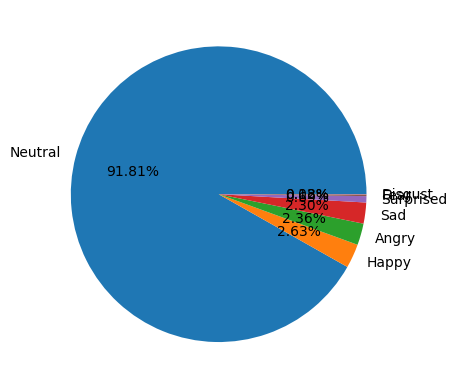

In [25]:
plt.pie(exp_label.PAGE,labels=exp_label.LABELS.unique(),autopct = '%1.2f%%')

Dari diagram pai ini, dapat dilihat bahwa ekspresi Neutral atau netral adalah ekspresi yang paling banyak ditunjukkan oleh siswa pada e-learning, yaitu dengan proporsi sebanyak 91.81% dari seluruh data yang ada. Kemudian ekspresi Happy atau senang memiliki proporsi sebanyak 2.63%, ekspresi Angry atau marah sebanyak 2.36%, ekspresi Sad atau sedih sebanyak 2.30%, dan untuk ekspresi Surprised, Fear, dan Disgust proporsinya kurang dari 1%, sehingga dapat disimpulkan bahwa ekspresi terkejut, takut, dan jijik adalah ekspresi yang sangat jarang ditunjukkan oleh siswa pengguna e-learning.

In [26]:
# Get to know the amount of each page's expressions of students
exp_page = exp[['LABELS', 'PAGE']]
exp_page = exp_page.groupby(['PAGE']).count().sort_values(by='LABELS', ascending=False).reset_index()
exp_page.head(3)

,PAGE,LABELS
0,Learning Journey,1663
1,Challenges,815
2,Transform - Latihan,438


In [27]:
# Get to know the amount of each expressions on every page
exp_stack = exp.groupby(['PAGE', 'LABELS']).size().unstack(fill_value=0).sort_values(by='PAGE', ascending=True)
exp_stack = exp_stack.reset_index()
exp_stack.head()

LABELS,PAGE,Angry,Disgust,Fear,Happy,Neutral,Sad,Surprised
0,404 - Page Not Found,0,0,0,0,6,0,0
1,Apa itu CSS? - Latihan,3,0,0,10,205,3,1
2,Background Color - Latihan,2,0,0,3,120,7,0
3,Background Color - Materi,4,0,1,5,66,4,0
4,Badges,0,0,0,0,17,0,0


In [28]:
new_df = exp_stack.merge(exp_page, on='PAGE', how='left')
new_df = new_df.rename(columns={'LABELS': 'Total'})
new_df = new_df.sort_values(by='Total', ascending=False).reset_index(drop=True)
new_df.head()

,PAGE,Angry,Disgust,Fear,Happy,Neutral,Sad,Surprised,Total
0,Learning Journey,33,0,6,55,1488,72,9,1663
1,Challenges,29,0,0,17,738,17,14,815
2,Transform - Latihan,21,0,0,9,402,3,3,438
3,Transform - Materi,20,0,1,16,363,4,8,412
4,Links - Latihan,2,1,0,8,356,4,1,372


In [74]:
# Convert to excel
# new_df.to_excel('eda_exp_per_page.xlsx', index=False)

In [29]:
# Function to create barplot
def barplot_h(ex, ye, data):
        fig, ax = plt.subplots(figsize=(9, 7))
        sns.set(font_scale=1)
        sns.barplot(x=ye, y=ex, data=data, ax=ax, palette='Set2')
        ax.set_xlim([50, 1700])
        ax.set_ylabel('Page', size=12)
        ax.set_xlabel('Jumlah', size=12)
        for c in ax.containers:
                ax.bar_label(c, fmt='%.0f', label_type='edge', size=9, padding=1)
        ax.margins(y=0.02)

def barplot_v(ex, ye, data):
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.set(font_scale=1)
        sns.barplot(x=ex, y=ye, data=data, ax=ax, palette='Set2')
        ax.set_ylabel('Jumlah', size=12)
        ax.set_xlabel('Ekspresi', size=12)
        for c in ax.containers:
                ax.bar_label(c, fmt='%.0f', label_type='edge', size=9, padding=1)
        ax.margins(y=0.02)

In [30]:
exp_page = exp_page.sort_values(by='LABELS', ascending=False)
exp_page.head(3)

,PAGE,LABELS
0,Learning Journey,1663
1,Challenges,815
2,Transform - Latihan,438


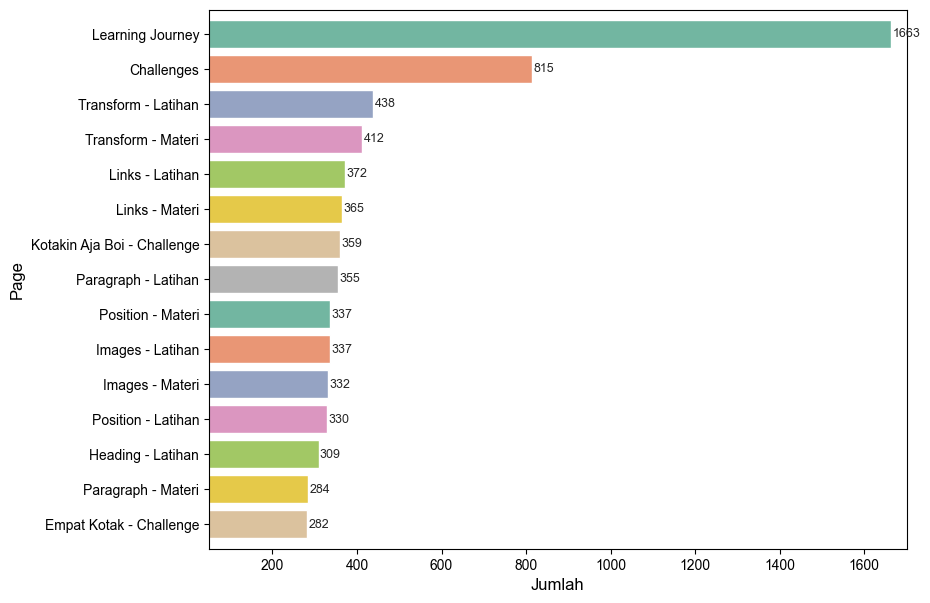

In [31]:
exp_page = exp_page.sort_values(by='LABELS', ascending=False)
barplot_h('PAGE', 'LABELS', exp_page.head(15))

Dari diagram batang horizontal ini, dapat dilihat bahwa halaman Learning Journey menjadi halaman dengan data ekspresi yang paling banyak, yaitu sebanyak 1663 data. Hal ini juga menunjukkan bahwa halaman Learning Journey adalah halaman yang paling banyak dikunjungi oleh siswa.

Untuk mengetahui lebih lanjut tentang hasil ini, terdapat beberapa cara yang bisa dilakukan sebagai tindak lanjut, salah satunya dengan mengeksplorasi banyaknya jumlah setiap ekspresi yang ditemukan pada halaman tersebut.

### Learning Journey

In [32]:
exp_learning = exp[exp['PAGE'] == 'Learning Journey']
exp_learning = exp_learning.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_learning

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,1488,1488,1488,1488,1488
1,Sad,72,72,72,72,72
2,Happy,55,55,55,55,55
3,Angry,33,33,33,33,33
4,Surprised,9,9,9,9,9
5,Fear,6,6,6,6,6


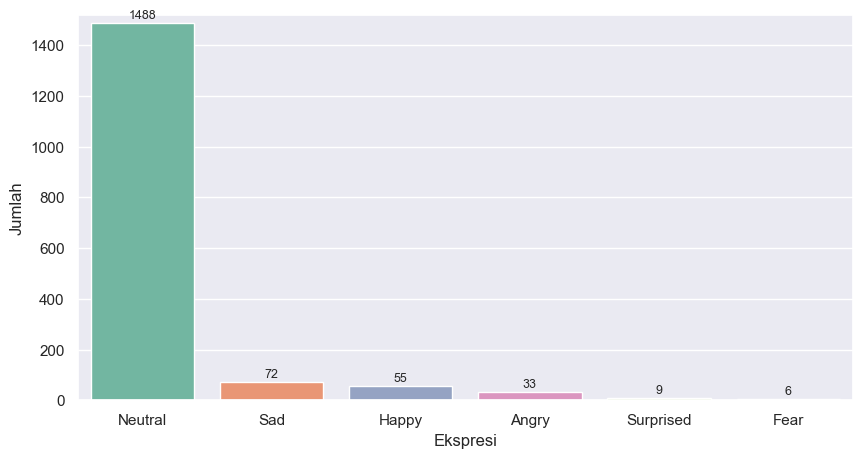

In [33]:
barplot_v('LABELS', 'PAGE', exp_learning)

Diagram batang vertikal ini menampilkan frekuensi munculnya setiap ekspresi pada halaman Learning Journey. Dari diagram ini, dapat dilihat bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan total muncul sebanyak 1488 kali. Ekspresi lain yang juga muncul adalah ekspresi sedih (72 kali), ekspresi senang (56 kali), ekspresi marah (33 kali), ekspresi terkejut (9 kali), dan ekspresi takut (6 kali).

### Challenges

In [35]:
exp_challenges = exp[exp['PAGE'] == 'Challenges']
exp_challenges = exp_challenges.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_challenges

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,738,738,738,738,738
1,Angry,29,29,29,29,29
2,Happy,17,17,17,17,17
3,Sad,17,17,17,17,17
4,Surprised,14,14,14,14,14


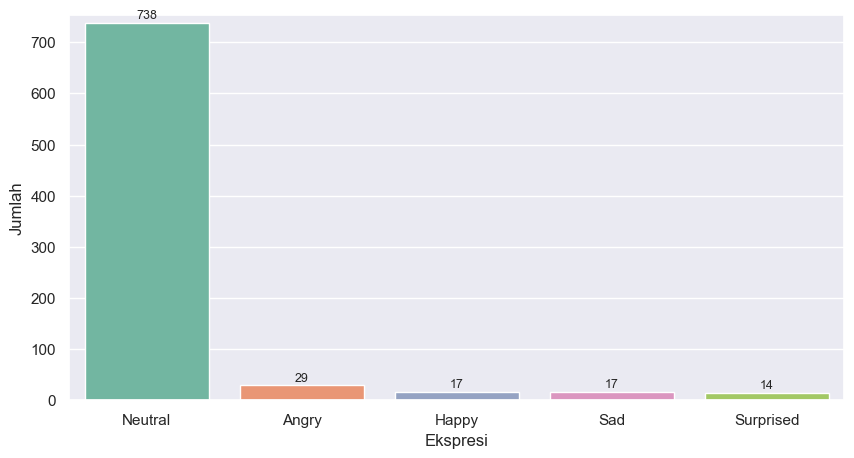

In [36]:
barplot_v('LABELS', 'PAGE', exp_challenges)

Diagram selanjutnya menampilkan frekuensi munculnya setiap ekspresi pada halaman Challenges, yaitu halaman dengan data ekspresi terbanyak kedua. Dari diagram ini, dapat dilihat bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 738 kali. Ekspresi lain yang juga muncul adalah ekspresi marah (29 kali), ekspresi senang (17 kali), ekspresi sedih (33 kali), dan ekspresi terkejut (14 kali).

Selanjutnya dilakukan eksplorasi terhadap halaman bagian materi pada HSS Learning. Tiga materi yang dipilih untuk dieksplorasi yaitu materi Transform, Links, dan Paragraph. 

### Transform - Materi

In [37]:
exp_transform_mat = exp[exp['PAGE'] == 'Transform - Materi']
exp_transform_mat = exp_transform_mat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_transform_mat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,363,363,363,363,363
1,Angry,20,20,20,20,20
2,Happy,16,16,16,16,16
3,Surprised,8,8,8,8,8
4,Sad,4,4,4,4,4
5,Fear,1,1,1,1,1


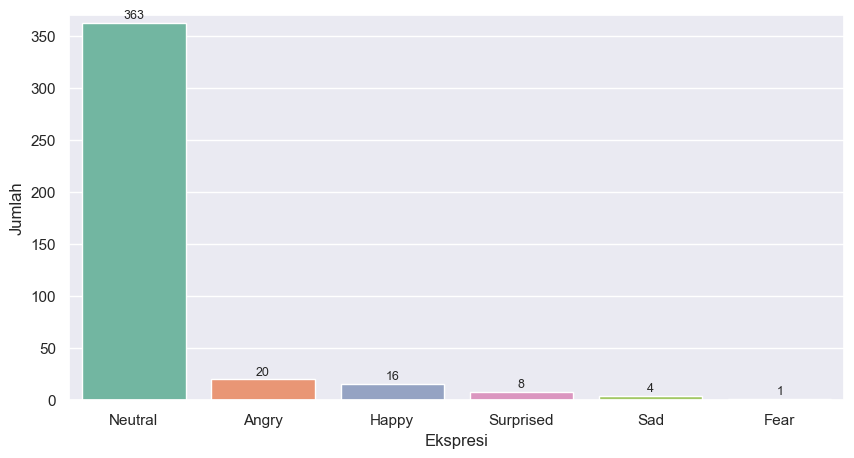

In [38]:
barplot_v('LABELS', 'PAGE', exp_transform_mat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 363 kali. Ekspresi lain yang juga muncul adalah ekspresi marah (20 kali), ekspresi senang (16 kali), ekspresi terkejut (8 kali), ekspresi sedih (4 kali), dan ekspresi takut (1 kali).

### Links - Materi

In [39]:
exp_links_mat = exp[exp['PAGE'] == 'Links - Materi']
exp_links_mat = exp_links_mat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_links_mat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,339,339,339,339,339
1,Angry,8,8,8,8,8
2,Happy,8,8,8,8,8
3,Sad,8,8,8,8,8
4,Fear,1,1,1,1,1
5,Surprised,1,1,1,1,1


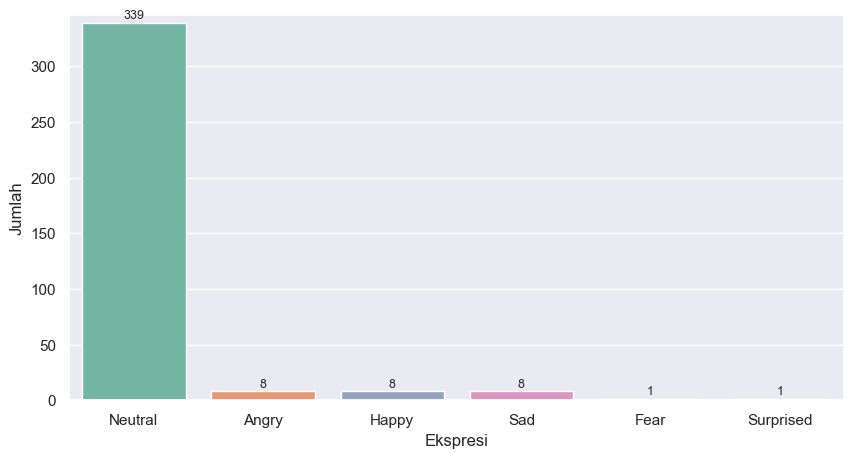

In [40]:
barplot_v('LABELS', 'PAGE', exp_links_mat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 339 kali. Ekspresi lain yang juga muncul adalah ekspresi marah (8 kali), ekspresi senang (8 kali), ekspresi sedih (8 kali), ekspresi takut (1 kali), dan ekspresi terkejut (1 kali).

### Position - Materi

In [41]:
exp_position_mat = exp[exp['PAGE'] == 'Paragraph - Materi']
exp_position_mat = exp_position_mat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_position_mat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,262,262,262,262,262
1,Sad,11,11,11,11,11
2,Happy,6,6,6,6,6
3,Angry,4,4,4,4,4
4,Surprised,1,1,1,1,1


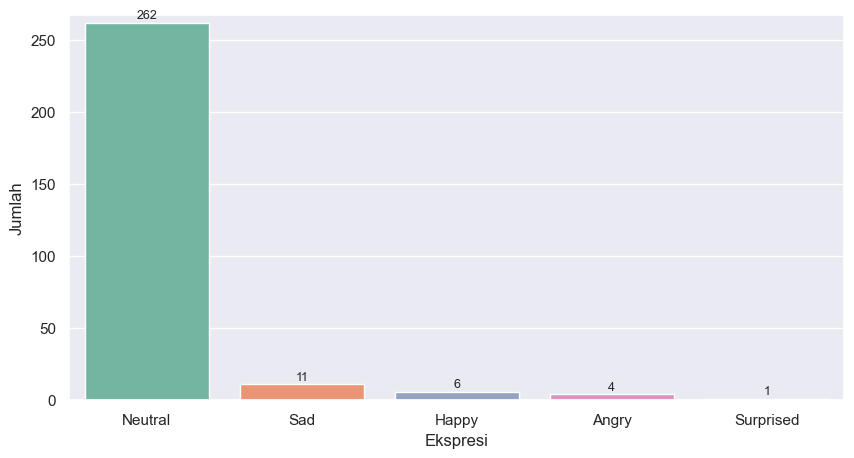

In [42]:
barplot_v('LABELS', 'PAGE', exp_position_mat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 262 kali. Ekspresi lain yang juga muncul adalah ekspresi sedih (11 kali), ekspresi senang (6 kali), ekspresi marah (4 kali), dan ekspresi terkejut (1 kali).

### Transform - Latihan

In [43]:
exp_transform_lat = exp[exp['PAGE'] == 'Transform - Latihan']
exp_transform_lat = exp_transform_lat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_transform_lat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,402,402,402,402,402
1,Angry,21,21,21,21,21
2,Happy,9,9,9,9,9
3,Sad,3,3,3,3,3
4,Surprised,3,3,3,3,3


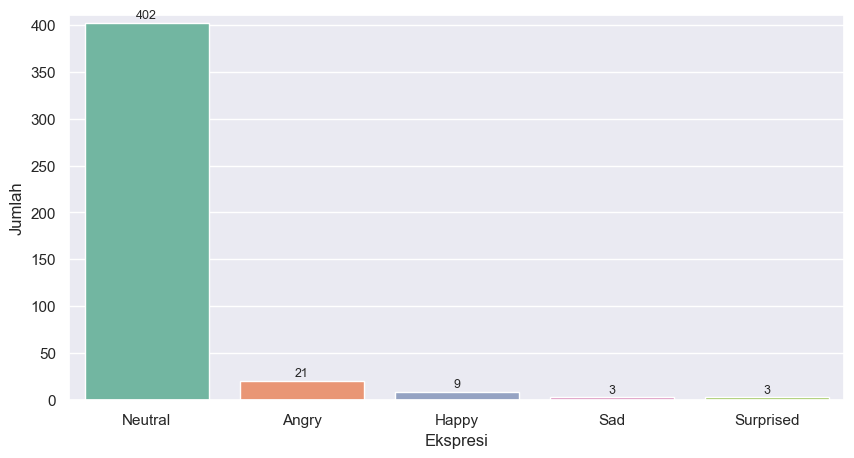

In [46]:
barplot_v('LABELS', 'PAGE', exp_transform_lat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 402 kali. Ekspresi lain yang juga muncul adalah ekspresi marah (21 kali), ekspresi senang (9 kali), ekspresi terkejut (3 kali), dan ekspresi sedih (3 kali).

### Links - Latihan

In [47]:
exp_links_lat = exp[exp['PAGE'] == 'Links - Latihan']
exp_links_lat = exp_links_lat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_links_lat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,356,356,356,356,356
1,Happy,8,8,8,8,8
2,Sad,4,4,4,4,4
3,Angry,2,2,2,2,2
4,Disgust,1,1,1,1,1
5,Surprised,1,1,1,1,1


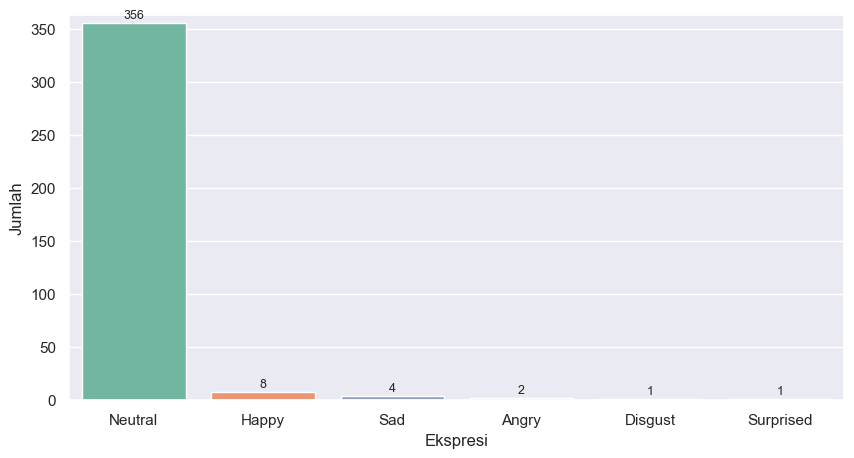

In [48]:
barplot_v('LABELS', 'PAGE', exp_links_lat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 356 kali. Ekspresi lain yang juga muncul adalah ekspresi senang (8 kali), ekspresi sedih (4 kali), ekspresi marah (2 kali), ekspresi jijik (1 kali), dan ekspresi terkejut (1 kali).

### Position - Latihan

In [50]:
exp_position_lat = exp[exp['PAGE'] == 'Position - Latihan']
exp_position_lat = exp_position_lat.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_position_lat

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,286,286,286,286,286
1,Happy,22,22,22,22,22
2,Angry,12,12,12,12,12
3,Sad,8,8,8,8,8
4,Surprised,2,2,2,2,2


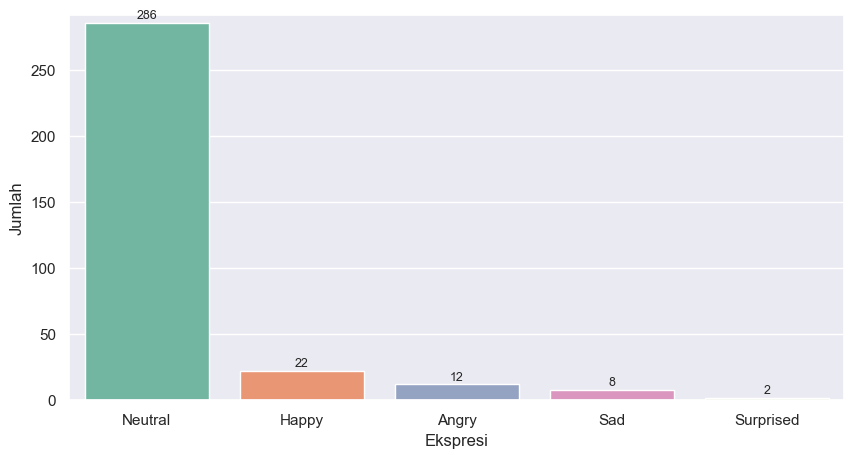

In [51]:
barplot_v('LABELS', 'PAGE', exp_position_lat)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 286 kali. Ekspresi lain yang juga muncul adalah ekspresi senang (22 kali), ekspresi marah (12 kali), ekspresi sedih (8 kali), dan ekspresi terkejut (2 kali).

### Empat Kotak - Challenge

In [53]:
exp_4kotak_cha = exp[exp['PAGE'] == 'Empat Kotak - Challenge']
exp_4kotak_cha = exp_4kotak_cha.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_4kotak_cha

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,247,247,247,247,247
1,Happy,12,12,12,12,12
2,Surprised,9,9,9,9,9
3,Angry,7,7,7,7,7
4,Sad,5,5,5,5,5
5,Fear,2,2,2,2,2


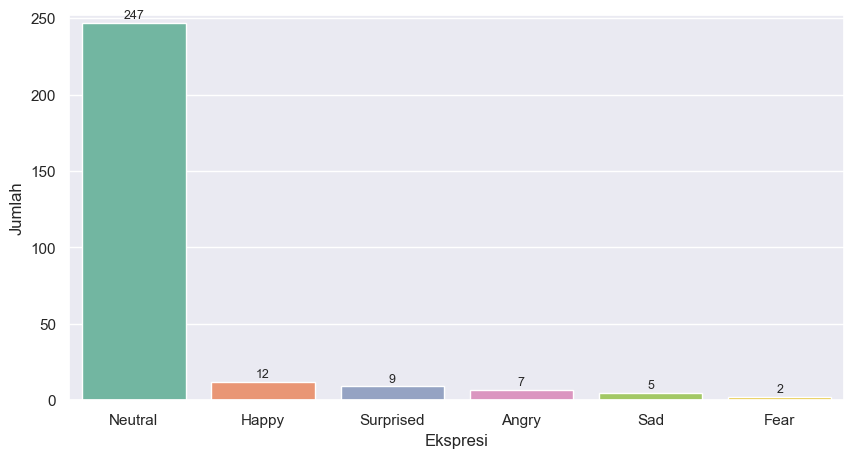

In [54]:
barplot_v('LABELS', 'PAGE', exp_4kotak_cha)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 247 kali. Ekspresi lain yang juga muncul adalah ekspresi senang (12 kali), ekspresi terkejut (9 kali), ekspresi marah (7 kali), eskpresi sedih (5 kali), dan ekspresi takut (2 kali).

### Kotakin Aja Boi - Challenge

In [55]:
exp_kotakin_cha = exp[exp['PAGE'] == 'Kotakin Aja Boi - Challenge']
exp_kotakin_cha = exp_kotakin_cha.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_kotakin_cha

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,333,333,333,333,333
1,Angry,13,13,13,13,13
2,Happy,5,5,5,5,5
3,Sad,4,4,4,4,4
4,Surprised,3,3,3,3,3
5,Fear,1,1,1,1,1


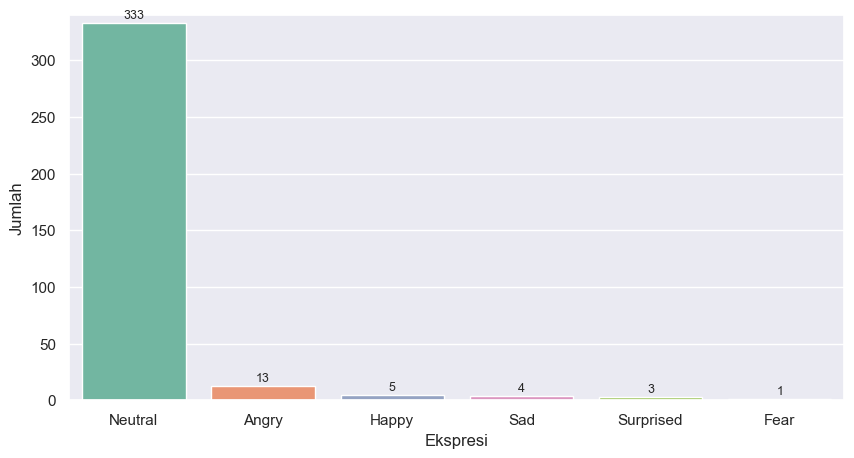

In [56]:
barplot_v('LABELS', 'PAGE', exp_kotakin_cha)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 333 kali. Ekspresi lain yang juga muncul adalah ekspresi marah (13 kali), ekspresi senang (5 kali), ekspresi sedih (4 kali), eskpresi tekejut (3 kali), dan ekspresi takut (1 kali).

### Efek Kesamaan Warna - Challenge

In [57]:
exp_efek_cha = exp[exp['PAGE'] == 'Efek Kesamaan Warna - Challenge']
exp_efek_cha = exp_efek_cha.groupby(['LABELS']).count().sort_values(by='PAGE', ascending=False).reset_index()
exp_efek_cha

,LABELS,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,PAGE
0,Neutral,158,158,158,158,158
1,Sad,8,8,8,8,8
2,Angry,4,4,4,4,4
3,Happy,4,4,4,4,4
4,Surprised,1,1,1,1,1


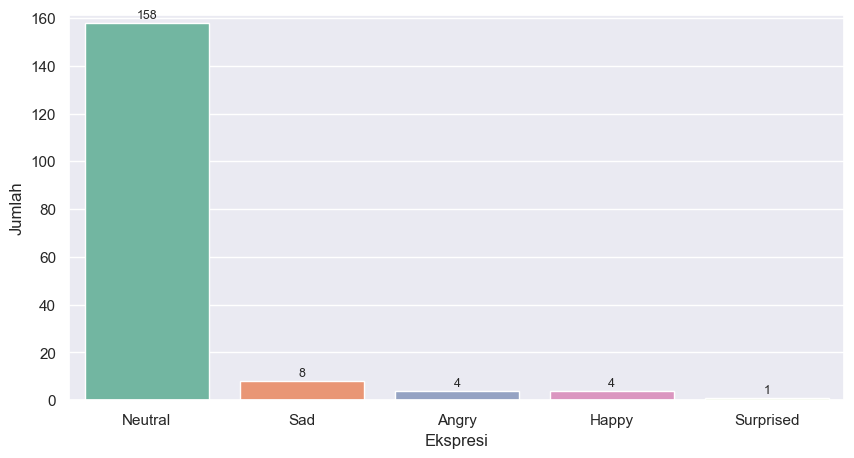

In [59]:
barplot_v('LABELS', 'PAGE', exp_efek_cha)

Ditemukan bahwa ekspresi netral adalah ekspresi yang paling sering muncul, dengan frekuensi kemunculan sebanyak 158 kali. Ekspresi lain yang juga muncul adalah ekspresi sedih (8 kali), ekspresi marah (4 kali), ekspresi senang (4 kali), dan ekspresi tekejut (1 kali).

## Visualize Random User on a Page

### User 34 on Lists - Materi

In [60]:
# Data ekspresi seorang user pada halaman Materi Lists
us34 = exp[exp['ID_USER'] == 34].reset_index(drop=True)
us34 = us34[us34['PAGE']=='Lists - Materi']
us34['TIMESTAMP_EXP'] = us34['TIMESTAMP_EXP'].str[14:]
us34

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,LABELS,PAGE
50,16:38,2022-04-27 15:16:38,34,34,Neutral,Lists - Materi
51,16:42,2022-04-27 15:16:42,34,34,Neutral,Lists - Materi
52,16:45,2022-04-27 15:16:45,34,34,Happy,Lists - Materi
53,16:48,2022-04-27 15:16:48,34,34,Neutral,Lists - Materi
54,16:52,2022-04-27 15:16:52,34,34,Happy,Lists - Materi
55,16:55,2022-04-27 15:16:55,34,34,Neutral,Lists - Materi


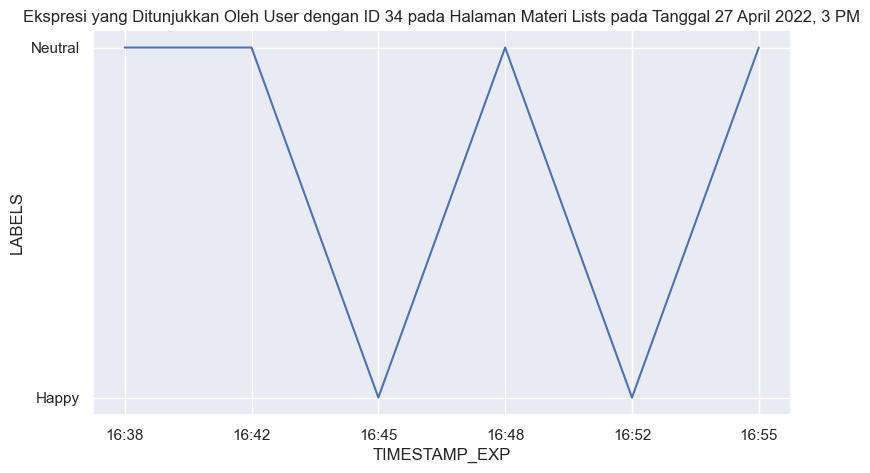

In [61]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.set(font_scale=1)
sns.lineplot(x="TIMESTAMP_EXP", y="LABELS", data=us34)
ax.set(title='Ekspresi yang Ditunjukkan Oleh User dengan ID 34 pada Halaman Materi Lists pada Tanggal 27 April 2022, 3 PM')
plt.show()

Pada halaman materi Lists, user menunjukkan dua ekspresi, yaitu netral (4 kali) dan senang (2 kali).

### User 9 on Transform - Latihan

In [62]:
# Data ekspresi seorang user pada halaman Latihan Transform
us9 = exp[exp['ID_USER'] == 9].reset_index(drop=True)
us9 = us9[us9['PAGE']=='Transform - Latihan'][43:]
us9['TIMESTAMP_EXP'] = us9['TIMESTAMP_EXP'].str[14:]
us9

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,LABELS,PAGE
311,40:29,2022-04-26 11:40:29,9,9,Neutral,Transform - Latihan
312,40:32,2022-04-26 11:40:32,9,9,Neutral,Transform - Latihan
313,40:35,2022-04-26 11:40:35,9,9,Neutral,Transform - Latihan
314,40:37,2022-04-26 11:40:37,9,9,Neutral,Transform - Latihan
315,40:38,2022-04-26 11:40:38,9,9,Neutral,Transform - Latihan
322,41:08,2022-04-26 11:41:08,9,9,Surprised,Transform - Latihan
323,41:11,2022-04-26 11:41:11,9,9,Surprised,Transform - Latihan
324,41:12,2022-04-26 11:41:12,9,9,Surprised,Transform - Latihan
325,41:17,2022-04-26 11:41:17,9,9,Neutral,Transform - Latihan
326,41:20,2022-04-26 11:41:20,9,9,Neutral,Transform - Latihan


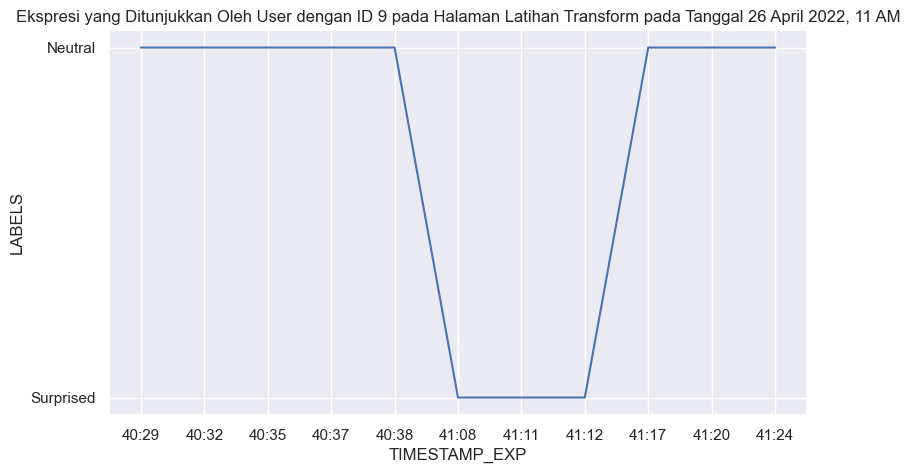

In [63]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.set(font_scale=1)
sns.lineplot(x="TIMESTAMP_EXP", y="LABELS", data=us9)
ax.set(title='Ekspresi yang Ditunjukkan Oleh User dengan ID 9 pada Halaman Latihan Transform pada Tanggal 26 April 2022, 11 AM')
plt.show()

User dengan nomor ID 9 adalah user dengan username DDAPEGertran, di mana user merupakan mahasiswa yang sedang mengambil mata kuliah Desain Dasar Antarmuka Pengguna (DDAP). Pada halaman latihan Lists, user menunjukkan dua ekspresi, yaitu netral (8 kali) dan tekejut (3 kali).

### User 109 on Empat Kotak - Challenge

In [65]:
us109 = exp[exp['ID_USER'] == 109].reset_index(drop=True)
us109 = us109[us109['PAGE']=='Empat Kotak - Challenge · HSS Learning']
us109['TIMESTAMP_EXP'] = us9['TIMESTAMP_EXP'].str[14:]
us109['DATE'] = np.where(['photos']!= '[]', True, False)

us109['DATE'] = np.where(us109['TIMESTAMP']!= '[]', True, False)
us109

,TIMESTAMP_EXP,TIMESTAMP,ID_USER_EXP,ID_USER,LABELS,PAGE,DATE
311,,NaN,NaN,NaN,NaN,NaN,True
312,,NaN,NaN,NaN,NaN,NaN,True
313,,NaN,NaN,NaN,NaN,NaN,True
314,,NaN,NaN,NaN,NaN,NaN,True
315,,NaN,NaN,NaN,NaN,NaN,True
322,,NaN,NaN,NaN,NaN,NaN,True
323,,NaN,NaN,NaN,NaN,NaN,True
324,,NaN,NaN,NaN,NaN,NaN,True
325,,NaN,NaN,NaN,NaN,NaN,True
326,,NaN,NaN,NaN,NaN,NaN,True


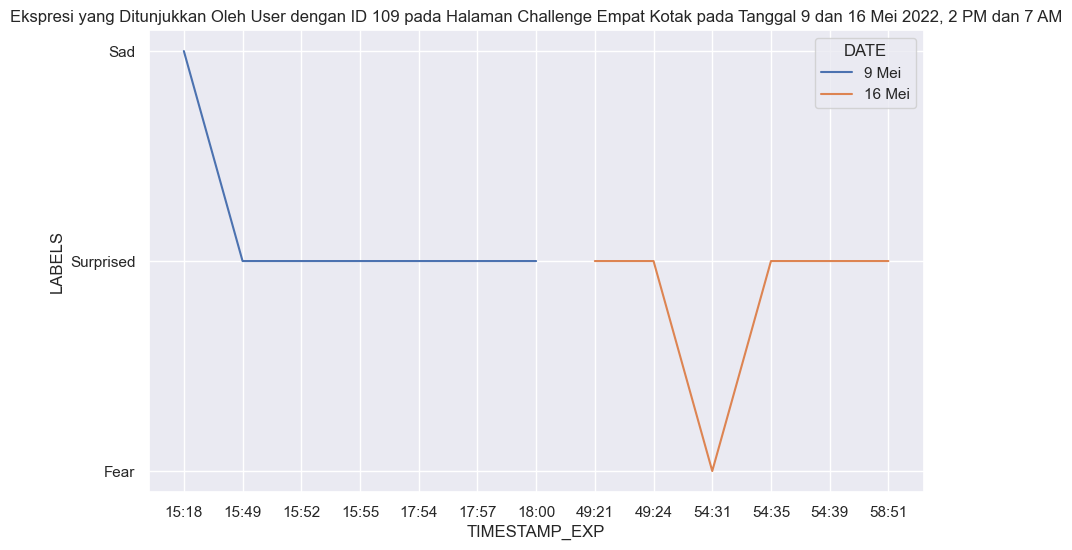

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale=1)
sns.lineplot(x="TIMESTAMP_EXP", y="LABELS", hue="DATE", data=us109)
ax.set(title='Ekspresi yang Ditunjukkan Oleh User dengan ID 109 pada Halaman Challenge Empat Kotak pada Tanggal 9 dan 16 Mei 2022, 2 PM dan 7 AM')
plt.show()

User dengan ID 109 ini ditemukan telah membuka halaman challenge Empat Kotak pada tanggal 9 Mei 2022 dan 16 Mei 2022. Pada tanggal 9 Mei 2022, user menunjukkan dua ekspresi, yaitu netral (6 kali) dan sedih (1 kali). Kemudian pada tanggal 16 Mei 2022, user juga menunjukkan dua eskpresi, yaitu netral (5 kali) dan takut (1 kali).  

# Modelling

In [122]:
df = pd.read_csv("data_vector.csv", sep=",")
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y67,x68,y68,e_left,e_right,l_left,l_right,m_width,m_height,ID_LABELS
0,229.452419,356.093793,233.072700,382.697789,239.577937,407.017036,246.066169,427.816592,255.373993,449.753891,...,467.230212,330.010349,467.113588,5.961667,6.060967,4.620668,4.551334,62.828336,18.717913,1
1,225.065079,349.910969,228.761761,376.257360,235.295003,400.591286,241.620106,421.084769,250.987503,443.689225,...,461.192693,321.091426,461.167499,5.994667,6.139699,4.420076,4.399097,61.370429,17.109366,7
2,219.001182,349.414862,221.871282,376.396733,228.013650,401.421438,233.964209,422.325008,243.005732,445.034585,...,467.624896,318.788377,467.534455,6.053836,6.276237,4.649788,4.486371,63.623881,19.205545,7
3,230.812902,351.179632,235.234657,377.335223,242.133538,401.469291,249.002683,422.019676,259.229043,444.852566,...,464.895929,332.850013,465.039409,6.303205,6.530325,4.437029,4.321533,60.782450,16.428886,7
4,227.052781,340.779437,230.287601,367.844866,235.494051,391.820544,241.258701,412.546219,250.550766,435.353995,...,460.196372,328.826058,460.142354,6.120034,6.552869,4.629499,4.593616,61.266467,16.827175,7


In [123]:
df.ID_LABELS.value_counts()

7    66282
4     2204
6     2153
1     1722
5      562
3      102
2       39
Name: ID_LABELS, dtype: int64

Plot function

In [124]:
def matrix(y_test, pred, cmap):
    cm = metrics.confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.4, square = True, cmap = cmap)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    score = accuracy_score(y_test, pred)
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 10)

## Without Undersampling & Oversampling

In [188]:
x,y = df.loc[:,df.columns != 'ID_LABELS'], df.loc[:,'ID_LABELS']

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [190]:
y_train.value_counts()

7    53007
4     1757
6     1712
1     1409
5      448
3       88
2       30
Name: ID_LABELS, dtype: int64

In [191]:
y_test.value_counts()

7    13275
4      447
6      441
1      313
5      114
3       14
2        9
Name: ID_LABELS, dtype: int64

In [192]:
y_test.value_counts().sum()

14613

In [128]:
list_model = ['KNN', 'LogR', 'LSVC']
list_accuracy = []
list_execution_time = []

## KNN

In [129]:
t1 = time.time()

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)

list_accuracy.append(accuracy_score(y_test, knnpred))

t2 = time.time()
list_execution_time.append(t2-t1)

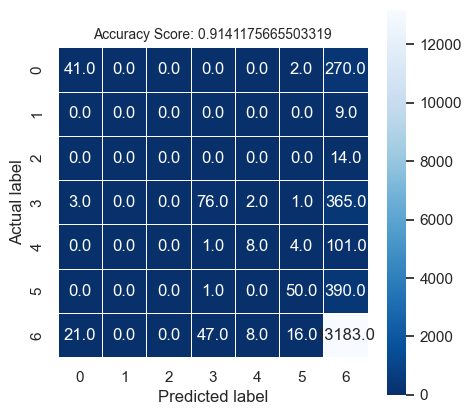

In [130]:
matrix(y_test, knnpred, 'Blues_r')
report = classification_report(y_test,knnpred,output_dict=True,  zero_division=True)
report1 = pd.DataFrame(report).transpose()
report1.to_excel("report_knn_imbl.xlsx")

In [131]:
report1

,precision,recall,f1-score,support
1,0.630769,0.130990,0.216931,313.000000
2,1.000000,0.000000,0.000000,9.000000
3,1.000000,0.000000,0.000000,14.000000
4,0.608000,0.170022,0.265734,447.000000
5,0.444444,0.070175,0.121212,114.000000
6,0.684932,0.113379,0.194553,441.000000
7,0.919830,0.993070,0.955048,13275.000000
accuracy,0.914118,0.914118,0.914118,0.914118
macro avg,0.755425,0.211091,0.250497,14613.000000
weighted avg,0.893428,0.914118,0.887193,14613.000000


## Logistic Regression

In [132]:
t1 = time.time()

logr = LogisticRegression(solver='newton-cg')
logr.fit(x_train,y_train)
logpred = logr.predict(x_test)

list_accuracy.append(accuracy_score(y_test, logpred))

t2 = time.time()
list_execution_time.append(t2-t1)

d:\Programs\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


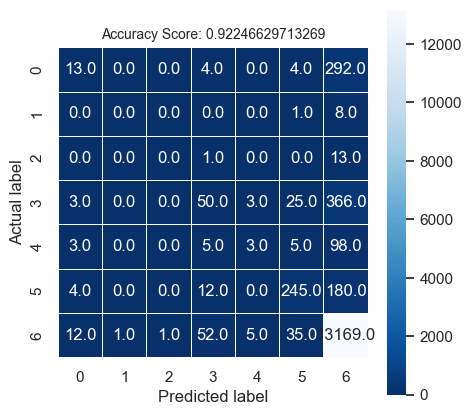

In [133]:
matrix(y_test, logpred, 'Blues_r')
report = classification_report(y_test,logpred, output_dict=True, zero_division=True)
report2 = pd.DataFrame(report).transpose()
report2.to_excel('report_logr_imbl.xlsx')

In [134]:
report2

,precision,recall,f1-score,support
1,0.371429,0.041534,0.074713,313.000000
2,0.000000,0.000000,0.000000,9.000000
3,0.000000,0.000000,0.000000,14.000000
4,0.403226,0.111857,0.175131,447.000000
5,0.272727,0.026316,0.048000,114.000000
6,0.777778,0.555556,0.648148,441.000000
7,0.932253,0.992015,0.961206,13275.000000
accuracy,0.922466,0.922466,0.922466,0.922466
macro avg,0.393916,0.246754,0.272457,14613.000000
weighted avg,0.892783,0.922466,0.900088,14613.000000


### Linear SVC

In [135]:
t1 = time.time()

lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
lspred = lsvc.predict(x_test)

list_accuracy.append(accuracy_score(y_test, lspred))

t2 = time.time()
list_execution_time.append(t2-t1)

d:\Programs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


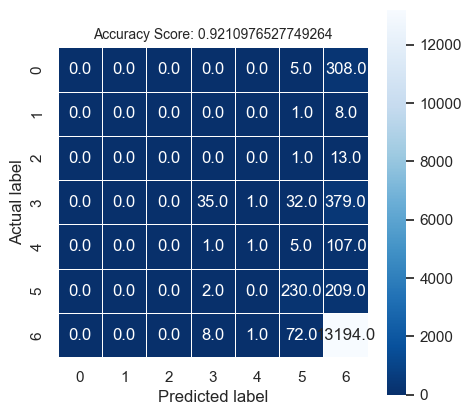

In [136]:
matrix(y_test, lspred, 'Blues_r')
report = classification_report(y_test, lspred, output_dict=True, zero_division=True)
report3 = pd.DataFrame(report).transpose()
report3.to_excel('report_lsvc_imbl.xlsx')

In [137]:
report3

,precision,recall,f1-score,support
1,1.000000,0.000000,0.000000,313.000000
2,1.000000,0.000000,0.000000,9.000000
3,1.000000,0.000000,0.000000,14.000000
4,0.760870,0.078300,0.141988,447.000000
5,0.333333,0.008772,0.017094,114.000000
6,0.664740,0.521542,0.584498,441.000000
7,0.927979,0.993898,0.959808,13275.000000
accuracy,0.921098,0.921098,0.921098,0.921098
macro avg,0.812417,0.228930,0.243341,14613.000000
weighted avg,0.911940,0.921098,0.894042,14613.000000


In [138]:
df_accuracy = pd.DataFrame(list(zip(list_model, list_accuracy)), columns=['Model', 'Accuracy Score'])
df_accuracy

,Model,Accuracy Score
0,KNN,0.914118
1,LogR,0.922466
2,LSVC,0.921098


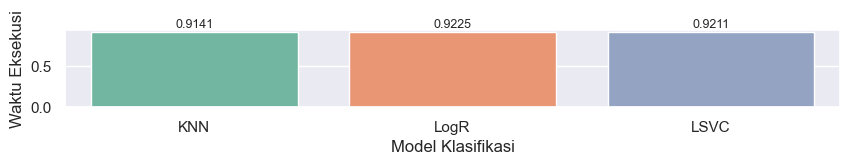

In [139]:
fig, ax = plt.subplots(figsize=(10, 1))
sns.set(font_scale=1)
sns.barplot(x='Model', y='Accuracy Score', data=df_accuracy, ax=ax, palette='Set2')
ax.set_ylabel('Waktu Eksekusi', size=12)
ax.set_xlabel('Model Klasifikasi', size=12)
for c in ax.containers:
        ax.bar_label(c, fmt='%.4f', label_type='edge', size=9, padding=1)
ax.margins(y=0.02)

In [140]:
df_time = pd.DataFrame(list(zip(list_model, list_execution_time)), columns=['Model', 'Execution Time'])
df_time

,Model,Execution Time
0,KNN,4.285936
1,LogR,123.636395
2,LSVC,255.854872


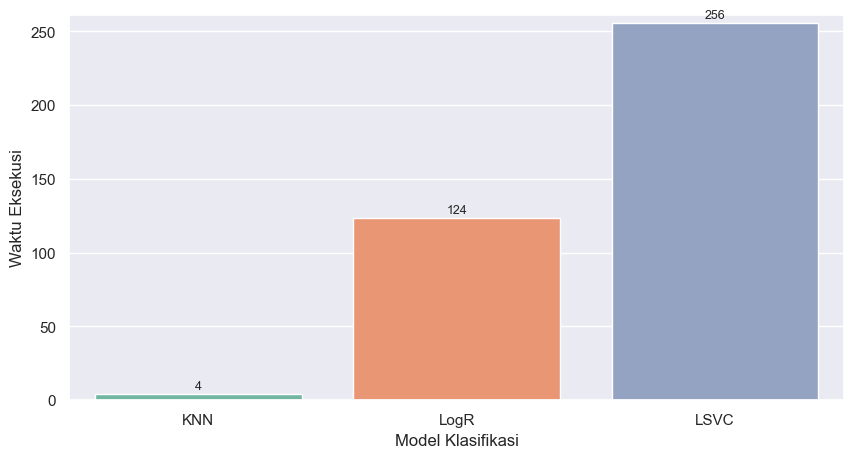

In [141]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1)
sns.barplot(x='Model', y='Execution Time', data=df_time, ax=ax, palette='Set2')
ax.set_ylabel('Waktu Eksekusi', size=12)
ax.set_xlabel('Model Klasifikasi', size=12)
for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge', size=9, padding=1)
ax.margins(y=0.02)

## With Undersampling & Oversampling

In [142]:
x,y = df.loc[:,df.columns != 'ID_LABELS'], df.loc[:,'ID_LABELS']

In [143]:
rus = RandomUnderSampler(
    sampling_strategy={
        1: 1722,
        2: 39,
        3: 102,
        4: 2204,
        5: 562,
        6: 2153,
        7: 10000
    },
    random_state=10
)
x_res, y_res = rus.fit_resample(x, y)

In [144]:
smt = SMOTE()
x_smt, y_smt = smt.fit_resample(x_res, y_res)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size = 0.2, random_state = 1)

In [146]:
y_train.value_counts()

5    8052
2    8052
4    8038
3    8004
1    7976
6    7966
7    7912
Name: ID_LABELS, dtype: int64

In [161]:
list_model = ['KNN', 'LogR', 'LinearSVC']
list_accuracy = []
list_execution_time = []

## KNN

In [162]:
t1 = time.time()

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)

list_accuracy.append(accuracy_score(y_test, knnpred))

t2 = time.time()
list_execution_time.append(t2-t1)

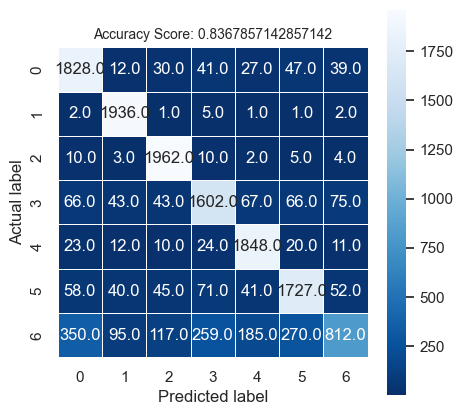

In [163]:
matrix(y_test, knnpred, 'Blues_r')
report = classification_report(y_test,knnpred,output_dict=True,  zero_division=True)
report1 = pd.DataFrame(report).transpose()
report1.to_excel("report_knn.xlsx")

In [164]:
report1

,precision,recall,f1-score,support
1,0.782199,0.903162,0.838340,2024.000000
2,0.904250,0.993840,0.946931,1948.000000
3,0.888587,0.982966,0.933397,1996.000000
4,0.796223,0.816514,0.806241,1962.000000
5,0.851221,0.948665,0.897305,1948.000000
6,0.808521,0.849066,0.828297,2034.000000
7,0.816080,0.388889,0.526760,2088.000000
accuracy,0.836786,0.836786,0.836786,0.836786
macro avg,0.835297,0.840443,0.825324,14000.000000
weighted avg,0.834796,0.836786,0.822779,14000.000000


## Logistic Regression

In [176]:
t1 = time.time()

logr = LogisticRegression(solver='newton-cg')
logr.fit(x_train,y_train)
logpred = logr.predict(x_test)
print('Logistic Regression' + '\n')
list_accuracy.append(accuracy_score(y_test, logpred))

t2 = time.time()
list_execution_time.append(t2-t1)

Logistic Regression



d:\Programs\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


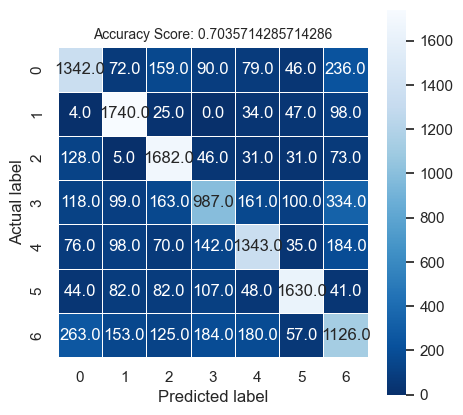

In [177]:
matrix(y_test, logpred, 'Blues_r')
report = classification_report(y_test,logpred, output_dict=True, zero_division=True)
report2 = pd.DataFrame(report).transpose()
report2.to_excel('report_logr.xlsx')

In [178]:
report2

,precision,recall,f1-score,support
1,0.679494,0.663043,0.671168,2024.000000
2,0.773677,0.893224,0.829164,1948.000000
3,0.729402,0.842685,0.781962,1996.000000
4,0.634319,0.503058,0.561114,1962.000000
5,0.715885,0.689425,0.702406,1948.000000
6,0.837616,0.801377,0.819095,2034.000000
7,0.538241,0.539272,0.538756,2088.000000
accuracy,0.703571,0.703571,0.703571,0.703571
macro avg,0.701233,0.704583,0.700524,14000.000000
weighted avg,0.700353,0.703571,0.699615,14000.000000


### Linear SVC

In [179]:
t1 = time.time()

lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
lspred = lsvc.predict(x_test)
print('Linear SVC' + '\n')
list_accuracy.append(accuracy_score(y_test, lspred))

t2 = time.time()
list_execution_time.append(t2-t1)

Linear SVC



d:\Programs\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


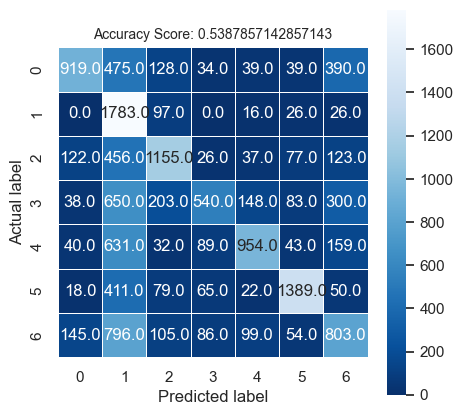

In [180]:
matrix(y_test, lspred, 'Blues_r')
report = classification_report(y_test, lspred, output_dict=True, zero_division=True)
report3 = pd.DataFrame(report).transpose()
report3.to_excel('report_lsvc.xlsx')

In [181]:
report3

,precision,recall,f1-score,support
1,0.716849,0.454051,0.555959,2024.000000
2,0.342753,0.915298,0.498741,1948.000000
3,0.642023,0.578657,0.608696,1996.000000
4,0.642857,0.275229,0.385439,1962.000000
5,0.725475,0.489733,0.584738,1948.000000
6,0.811806,0.682891,0.741789,2034.000000
7,0.433820,0.384579,0.407718,2088.000000
accuracy,0.538786,0.538786,0.538786,0.538786
macro avg,0.616512,0.540063,0.540440,14000.000000
weighted avg,0.616543,0.538786,0.540513,14000.000000


In [182]:
df_accuracy = pd.DataFrame(list(zip(list_model, list_accuracy)), columns=['Model', 'Accuracy Score'])
df_accuracy

,Model,Accuracy Score
0,KNN,0.836786
1,LogR,0.703571
2,LinearSVC,0.375786


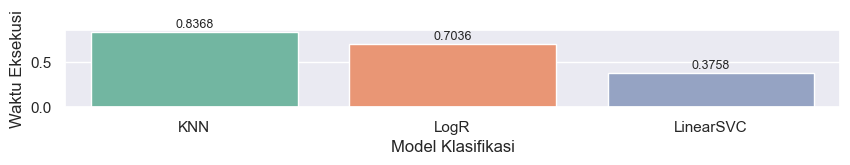

In [183]:
fig, ax = plt.subplots(figsize=(10, 1))
sns.set(font_scale=1)
sns.barplot(x='Model', y='Accuracy Score', data=df_accuracy, ax=ax, palette='Set2')
ax.set_ylabel('Waktu Eksekusi', size=12)
ax.set_xlabel('Model Klasifikasi', size=12)
for c in ax.containers:
        ax.bar_label(c, fmt='%.4f', label_type='edge', size=9, padding=1)
ax.margins(y=0.02)

In [184]:
df_time = pd.DataFrame(list(zip(list_model, list_execution_time)), columns=['Model', 'Execution Time'])
df_time

,Model,Execution Time
0,KNN,2.909021
1,LogR,176.532536
2,LinearSVC,313.050556


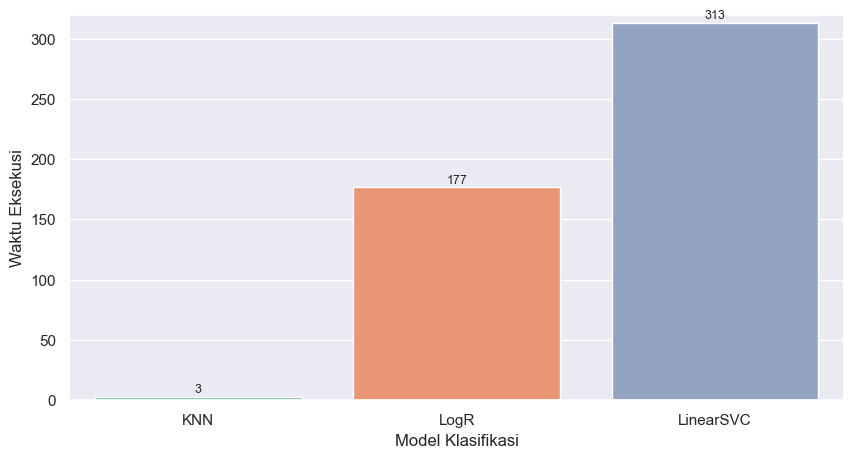

In [185]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1)
sns.barplot(x='Model', y='Execution Time', data=df_time, ax=ax, palette='Set2')
ax.set_ylabel('Waktu Eksekusi', size=12)
ax.set_xlabel('Model Klasifikasi', size=12)
for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge', size=9, padding=1)
ax.margins(y=0.02)